In [129]:
import networkx as nx

## ALT 1 - Graph with Classes

In [130]:
class Node:
  
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}
        
    def addNeighbor(self, nbr, weight = 0):
        self.connectedTo[nbr] = weight
        
    def __str__(self):
        return f"{str(self.id)} connected to: {str([x.id for x in self.connectedTo])}"
      
    def getConnections(self):
        return self.connectedTo.keys()
        
    def getId(self):
        return self.id
      
    def getWeight(self, nbr):
        return self.connectedTo.get(nbr)
      
class Graph:
  
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
        
    def addNode(self, key):
        """
        Add a Node to the Graph network with the id of key
        """
        
        #add 1 to the number of vertices attribute
        self.numVertices += 1
        
        #instantiate a new Node class
        newNode = Node(key)
        
        #add the Node with the key to the vertList dictionary
        self.vertList[key] = newNode
        
        #return the NewNode created
        return newNode  
      
    def getNode(self, key):
        """
        If Node with key is in Graph then return the Node
        """
        
        #use the get method to return the Node if it exists
        #otherwise it will return None
        return self.vertList.get(key)
      
    def __contains__(self, key):
        """
        Check whether Node with key is in the Graph
        """
        
        #returns True or False depending if in list
        return key in self.vertList
      
    def addEdge(self, f, t, weight = 0):
        """
        Add an edge to connect two vertices of t and f with weight
        assuming directed graph
        """
        
        #add vertices if they do not exist
        if f not in self.vertList:
            nv = self.addNode(f)
        if t not in self.vertList:
            nv = self.addNode(t)
            
        #then add Neighbor from f to t with weight
        self.vertList[f].addNeighbor(self.vertList[t], weight)
        
    def getVertices(self):
        """
        Return all the vertices in the graph
        """
       
        return self.vertList.keys()
      
    def getCount(self):
        """
        Return a count of all vertices in the Graph
        """
        return self.numVertices

In [131]:
psylve = Graph()

In [132]:
edges = [('hi','hola'),('hola','salut')]

In [133]:
for f,t in edges:
    psylve.addEdge(f, t)
psylve.getVertices()

dict_keys(['hi', 'hola', 'salut'])

## ALT 2 - Graph with NX

In [134]:
import pandas as pd

In [135]:
def edges_to_pd_graph(edges):
    g = pd.DataFrame.from_records(edges, columns =['source', 'target', 'type', 'weight'][:(len(edges[0]))])
    return g

def load_edges(filename):
    with open(filename,'r') as f:
        df = pd.read_csv(f, sep='\t', header=0)
    return df

In [136]:
psylve_pd = edges_to_pd_graph(edges)
psylve_pd = load_edges('edges.tsv')
psylve_pd.head()

,source,target
0,hi,hola
1,hola,salut
2,salut,ciao


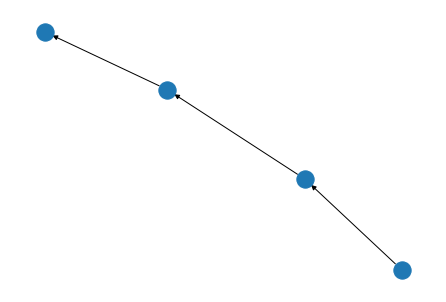

In [137]:
psylve_nx = nx.from_pandas_edgelist(psylve_pd, source='source', target='target', edge_attr=None, create_using=nx.DiGraph())
nx.draw(psylve_nx)

### Visualisation

In [138]:
from pyvis.network import Network

net = Network(notebook=True, directed =True)

net.from_nx(psylve_nx)

net.show('PsylVe.html')